# Churn Prediction Project: Logistic Regression

## Introduction

In this project, we aim to predict customer churn for a credit card company. Customer churn is when a customer stops using a company's products or services. Identifying customers who are likely to churn allows businesses to take proactive measures to retain them, thus reducing revenue losses and improving customer satisfaction.

### Objectives
- Use a logistic regression model to predict whether a customer will churn or not.
- Identify the key factors influencing customer churn.
- Provide actionable insights to improve customer retention strategies.

### Why This Matters
Understanding customer churn helps businesses:
1. Reduce the cost of acquiring new customers by retaining existing ones.
2. Improve customer satisfaction through targeted interventions.
3. Enhance revenue and profitability.

We will follow the CRISP-DM methodology, which includes the following stages:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

Let's begin by creating a dataset for our analysis.


In [2]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate synthetic data
data = {
    "CustomerID": range(1, num_samples + 1),
    "Age": np.random.randint(18, 75, num_samples),
    "Gender": np.random.choice(["Male", "Female"], num_samples),
    "CreditScore": np.random.randint(300, 850, num_samples),
    "AnnualIncome": np.random.randint(20000, 150000, num_samples),
    "LatePayments": np.random.randint(0, 10, num_samples),
    "TransactionFrequency": np.random.randint(1, 30, num_samples),
    "Complaints": np.random.randint(0, 5, num_samples),
    "AccountAgeYears": np.random.randint(1, 20, num_samples),
    "Churn": np.random.choice([0, 1], num_samples, p=[0.8, 0.2])  # 20% churn rate
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()


,CustomerID,Age,Gender,CreditScore,AnnualIncome,LatePayments,TransactionFrequency,Complaints,AccountAgeYears,Churn
0,1,56,Male,739,107896,7,17,4,14,0
1,2,69,Female,618,82292,7,3,3,3,0
2,3,46,Male,601,49055,4,5,1,5,0
3,4,32,Female,643,62891,8,19,2,16,0
4,5,60,Male,310,101912,0,12,4,18,1


In [4]:
# Check the structure of the dataset
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            1000 non-null   int64 
 1   Age                   1000 non-null   int64 
 2   Gender                1000 non-null   object
 3   CreditScore           1000 non-null   int64 
 4   AnnualIncome          1000 non-null   int64 
 5   LatePayments          1000 non-null   int64 
 6   TransactionFrequency  1000 non-null   int64 
 7   Complaints            1000 non-null   int64 
 8   AccountAgeYears       1000 non-null   int64 
 9   Churn                 1000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 78.3+ KB


,CustomerID,Age,CreditScore,AnnualIncome,LatePayments,TransactionFrequency,Complaints,AccountAgeYears,Churn
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,500.500000,46.247000,574.18900,81215.170000,4.496000,15.549000,2.053000,10.076000,0.2000
std,288.819436,16.288072,157.45111,37125.220164,2.906619,8.147514,1.391448,5.516762,0.4002
min,1.000000,18.000000,300.00000,20138.000000,0.000000,1.000000,0.000000,1.000000,0.0000
25%,250.750000,33.000000,440.00000,48350.750000,2.000000,8.000000,1.000000,5.000000,0.0000
50%,500.500000,46.000000,577.00000,81478.000000,5.000000,16.000000,2.000000,10.000000,0.0000
75%,750.250000,60.250000,705.00000,110755.250000,7.000000,23.000000,3.000000,15.000000,0.0000
max,1000.000000,74.000000,849.00000,149951.000000,9.000000,29.000000,4.000000,19.000000,1.0000


### Step 1: Check for Missing Values

It's essential to ensure the dataset is complete and does not have missing values that could affect the analysis.


In [7]:
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
CustomerID              0
Age                     0
Gender                  0
CreditScore             0
AnnualIncome            0
LatePayments            0
TransactionFrequency    0
Complaints              0
AccountAgeYears         0
Churn                   0
dtype: int64


### Step 2: View Basic Statistics

We'll examine the basic statistics of the dataset to understand the spread and distribution of numerical features.


In [10]:
# Summary statistics for numerical columns
print(df.describe())


        CustomerID          Age  CreditScore   AnnualIncome  LatePayments  \
count  1000.000000  1000.000000   1000.00000    1000.000000   1000.000000   
mean    500.500000    46.247000    574.18900   81215.170000      4.496000   
std     288.819436    16.288072    157.45111   37125.220164      2.906619   
min       1.000000    18.000000    300.00000   20138.000000      0.000000   
25%     250.750000    33.000000    440.00000   48350.750000      2.000000   
50%     500.500000    46.000000    577.00000   81478.000000      5.000000   
75%     750.250000    60.250000    705.00000  110755.250000      7.000000   
max    1000.000000    74.000000    849.00000  149951.000000      9.000000   

       TransactionFrequency   Complaints  AccountAgeYears      Churn  
count           1000.000000  1000.000000      1000.000000  1000.0000  
mean              15.549000     2.053000        10.076000     0.2000  
std                8.147514     1.391448         5.516762     0.4002  
min                1.0

### Visualize the Target Variable

We will visualize the distribution of the target variable (`Churn`) to check whether the dataset is balanced.


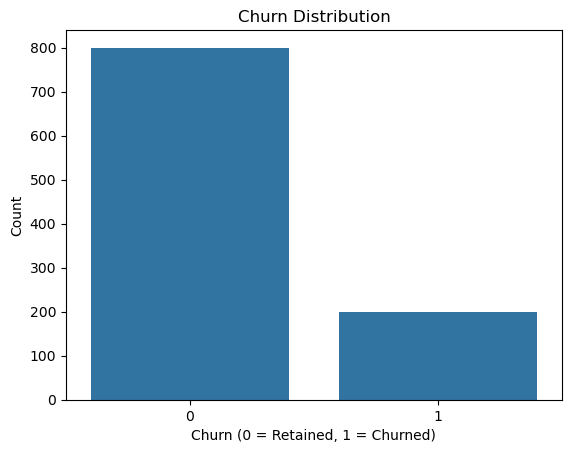

In [13]:
# Visualize churn distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Count")
plt.show()


### Step 4: Explore Relationships Between Features and Churn

We will visualize relationships between key features (`Age`, `CreditScore`, `AnnualIncome`) and the target variable (`Churn`).


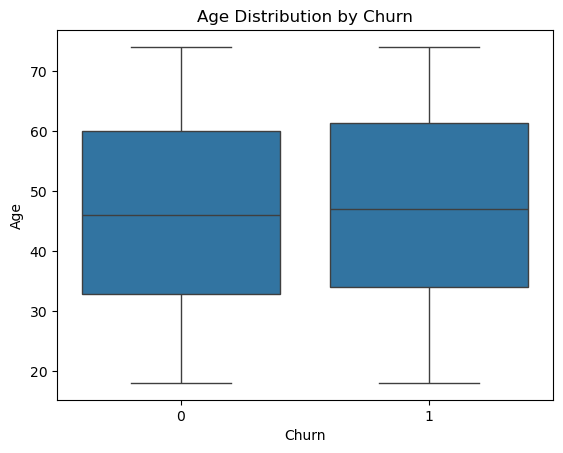

In [16]:
sns.boxplot(data=df, x='Churn', y='Age')
plt.title("Age Distribution by Churn")
plt.show()


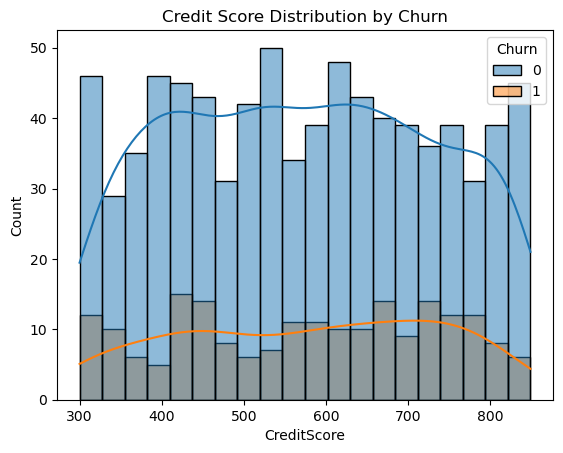

In [18]:
sns.histplot(data=df, x='CreditScore', hue='Churn', kde=True, bins=20)
plt.title("Credit Score Distribution by Churn")
plt.show()


1. Identify missing values in each column.
2. If missing values are found:
   - Decide whether to fill them with appropriate values (mean, median, or mode).
   - Drop rows or columns if missing values are sparse.
3. Confirm that the dataset is complete before proceeding.


In [25]:
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
CustomerID              0
Age                     0
Gender                  0
CreditScore             0
AnnualIncome            0
LatePayments            0
TransactionFrequency    0
Complaints              0
AccountAgeYears         0
Churn                   0
dtype: int64


1. Generate summary statistics for all numerical columns.
2. Analyze the mean, median, minimum, and maximum values for potential insights.
3. Look for unusual patterns, such as very high standard deviations or negative values where they aren't expected.


In [28]:
# Summary statistics for numerical columns
print(df.describe())


        CustomerID          Age  CreditScore   AnnualIncome  LatePayments  \
count  1000.000000  1000.000000   1000.00000    1000.000000   1000.000000   
mean    500.500000    46.247000    574.18900   81215.170000      4.496000   
std     288.819436    16.288072    157.45111   37125.220164      2.906619   
min       1.000000    18.000000    300.00000   20138.000000      0.000000   
25%     250.750000    33.000000    440.00000   48350.750000      2.000000   
50%     500.500000    46.000000    577.00000   81478.000000      5.000000   
75%     750.250000    60.250000    705.00000  110755.250000      7.000000   
max    1000.000000    74.000000    849.00000  149951.000000      9.000000   

       TransactionFrequency   Complaints  AccountAgeYears      Churn  
count           1000.000000  1000.000000      1000.000000  1000.0000  
mean              15.549000     2.053000        10.076000     0.2000  
std                8.147514     1.391448         5.516762     0.4002  
min                1.0

1. Visualize the distribution of the target variable (`Churn`) using a count plot.
2. Check if the dataset is balanced or imbalanced.

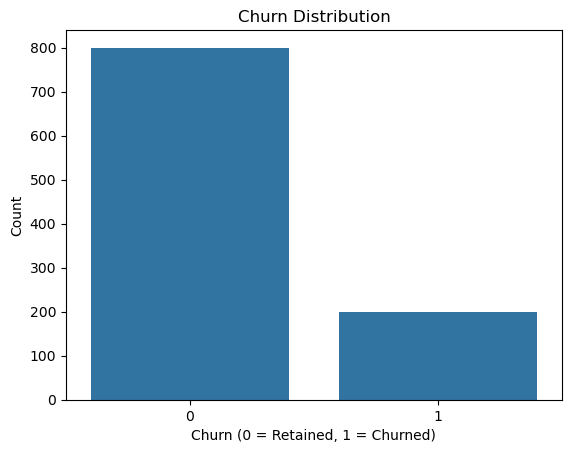

In [31]:
# Visualize churn distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Count")
plt.show()


1. **Age vs. Churn**: To understand if age impacts churn.
2. **CreditScore vs. Churn**: To see how credit score correlates with churn.
3. **AnnualIncome vs. Churn**: To examine the role of income in customer retention.

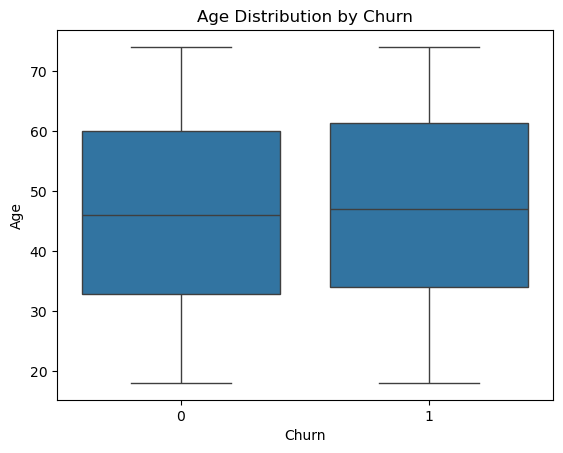

In [34]:
sns.boxplot(data=df, x='Churn', y='Age')
plt.title("Age Distribution by Churn")
plt.show()


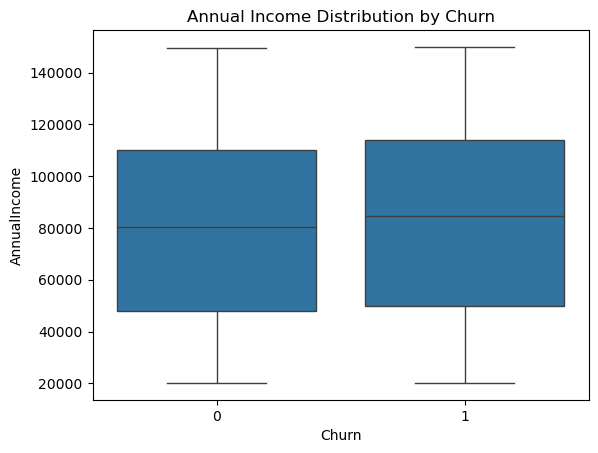

In [36]:
sns.boxplot(data=df, x='Churn', y='AnnualIncome')
plt.title("Annual Income Distribution by Churn")
plt.show()


1. Calculate the correlation matrix for all numerical features.
2. Visualize the correlation matrix using a heatmap.
3. Focus on features with strong positive or negative correlations with `Churn`.

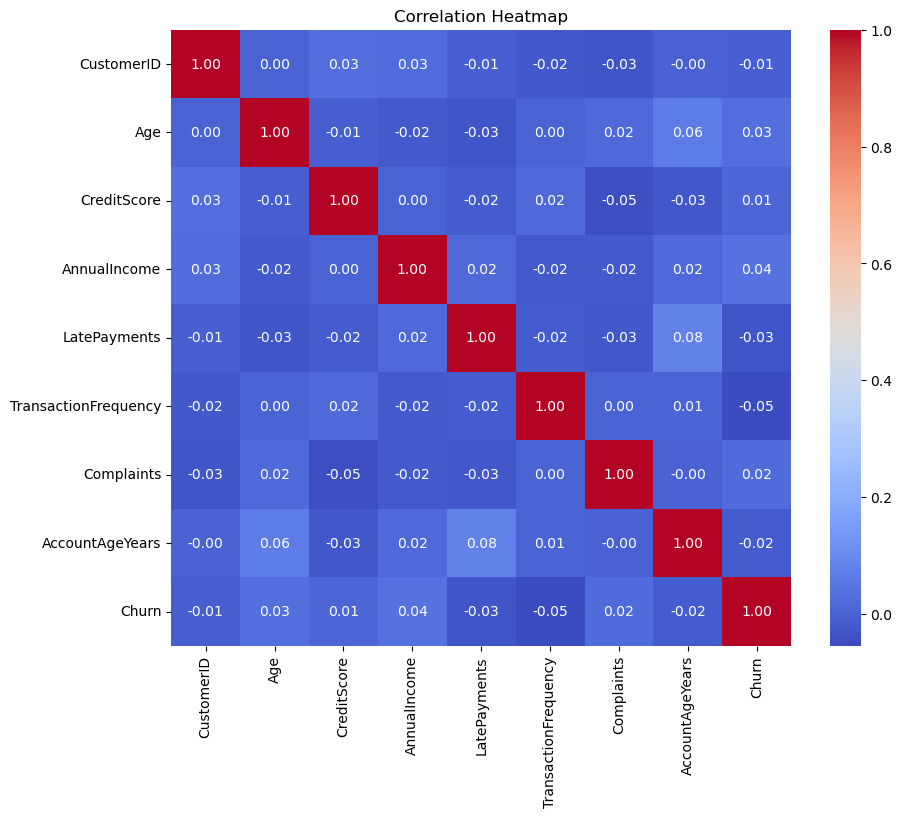

In [43]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


- Select features that are strongly correlated with `Churn` for modeling.
- Remove features that are weakly correlated (if necessary) to reduce noise.

Based on the heatmap, we will select features that are most strongly correlated (positively or negatively) with the target variable (`Churn`).

In [47]:
# Select features based on correlation with Churn
selected_features = ['Age', 'CreditScore', 'AnnualIncome', 'LatePayments', 'TransactionFrequency', 'Complaints']

# Create a new DataFrame with selected features
df_selected = df[selected_features + ['Churn']]

# Display the first few rows of the selected dataset
df_selected.head()


,Age,CreditScore,AnnualIncome,LatePayments,TransactionFrequency,Complaints,Churn
0,56,739,107896,7,17,4,0
1,69,618,82292,7,3,3,0
2,46,601,49055,4,5,1,0
3,32,643,62891,8,19,2,0
4,60,310,101912,0,12,4,1


1. Encode categorical variables (if any).
2. Scale numerical features for consistency.
3. Split the dataset into training and testing sets.

In [50]:
# Convert Gender to numeric (if still categorical)
if 'Gender' in df_selected.columns:
    df_selected['Gender'] = df_selected['Gender'].map({'Male': 0, 'Female': 1})


In [54]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_features = ['Age', 'CreditScore', 'AnnualIncome', 'LatePayments', 'TransactionFrequency', 'Complaints']

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features (use .loc to avoid SettingWithCopyWarning)
df_selected.loc[:, numerical_features] = scaler.fit_transform(df_selected[numerical_features])


1. **Training Set (70%)**: Used to train the model.
2. **Testing Set (30%)**: Used to evaluate the model's performance.


In [57]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_selected.drop('Churn', axis=1)
y = df_selected['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (700, 6)
Testing Features Shape: (300, 6)
Training Target Shape: (700,)
Testing Target Shape: (300,)


1. Train the Logistic Regression model on the training set.
2. Use the trained model to make predictions on the test set.
3. Evaluate the model's performance using accuracy, precision, recall, F1-score, and a confusion matrix.

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [64]:
# Initialize the Logistic Regression model with class weights
model = LogisticRegression(random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model again
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Balanced Class Weights:", accuracy)
print("Classification Report with Balanced Class Weights:")
print(classification_report(y_test, y_pred))


Accuracy with Balanced Class Weights: 0.49666666666666665
Classification Report with Balanced Class Weights:
              precision    recall  f1-score   support

           0       0.78      0.51      0.61       237
           1       0.20      0.46      0.28        63

    accuracy                           0.50       300
   macro avg       0.49      0.48      0.45       300
weighted avg       0.66      0.50      0.54       300



In [66]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [68]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with SMOTE:", accuracy)
print("Classification Report with SMOTE:")
print(classification_report(y_test, y_pred))


Accuracy with SMOTE: 0.5066666666666667
Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.78      0.52      0.63       237
           1       0.20      0.44      0.27        63

    accuracy                           0.51       300
   macro avg       0.49      0.48      0.45       300
weighted avg       0.66      0.51      0.55       300



1. Evaluate the updated model's accuracy and classification report.
2. Analyze the confusion matrix to see how well the model distinguishes between churned and non-churned customers.
3. Interpret the results to decide if further improvements are needed.

Updated Accuracy: 0.5066666666666667
Updated Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.52      0.63       237
           1       0.20      0.44      0.27        63

    accuracy                           0.51       300
   macro avg       0.49      0.48      0.45       300
weighted avg       0.66      0.51      0.55       300



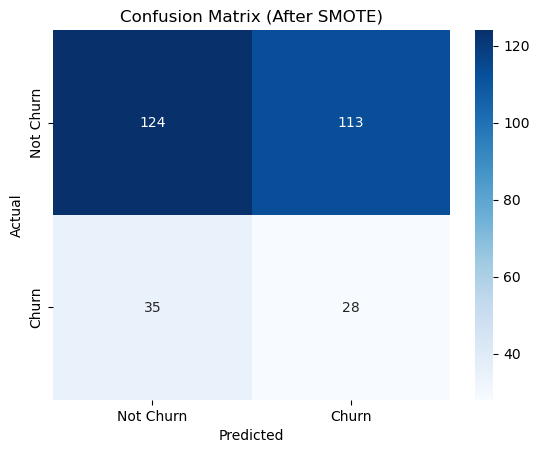

In [71]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Updated Accuracy:", accuracy)

# Generate a classification report
print("Updated Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (After SMOTE)")
plt.show()
